Connected to ai (Python 3.11.13)

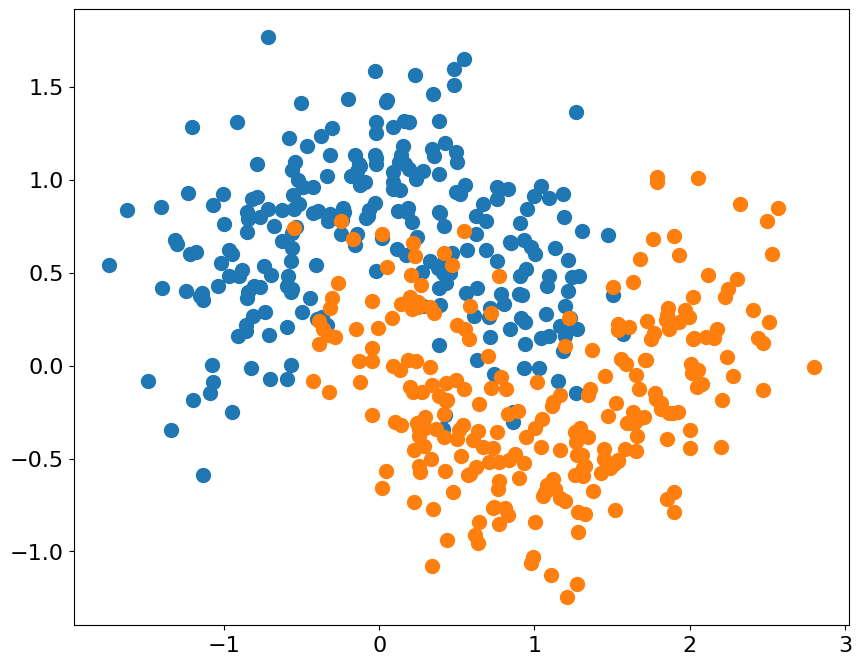

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

x, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.figure(figsize=(10, 8))
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
log_clf.score(x_test, y_test)

0.864

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_clf.score(x_test, y_test)

0.896

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=666)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.864

In [8]:
y_predict1 = log_clf.predict(x_test)
y_predict2 = svm_clf.predict(x_test)
y_predict3 = dt_clf.predict(x_test)

y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')
print(y_predict[:10])

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

[1 0 0 1 1 1 0 0 0 0]


0.904

In [9]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))
], voting='hard')
voting_clf.fit(x_train, y_train)
voting_clf.score(x_test, y_test)

0.904